# Fake News Classifier

In [1]:
import pandas as pd 

df = pd.read_csv("fake_news.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [2]:
# Get the Independent Features and Dependent Feature

X = df.drop("label" , axis = 1)
y = df.label

In [3]:
X.shape , y.shape

((20800, 4), (20800,))

## Text Preprocessing

In [6]:
df = df.dropna()

In [7]:
# Copy the dataframe
messages = df.copy()

# Reset the index because after droping some index also drop
messages.reset_index(inplace=True)

In [8]:
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
messages["title"][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [12]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [13]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [14]:
# Applying Countvectorizer , Creating Bag of words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000 , ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()


In [18]:
x.shape

(18285, 5000)

In [19]:
y = messages["label"]

In [20]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [21]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [22]:
cv.get_feature_names()[:10]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [23]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [24]:
count_df = pd.DataFrame(X_train , columns=cv.get_feature_names())

count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,...,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,year sinc,yemen,yet,yet anoth,yiannopoulo,yield,yo,york,york citi,york new,york new york,york state,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## MultinomialNB Algorithm

It best for text data and handle multiple category output

In [25]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np 

classifier = MultinomialNB()


In [26]:
from sklearn import metrics

classifier.fit(X_train , y_train)
pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test , pred)
print("Accuracy :-%0.3f" % score)


Accuracy :-0.894


## Confusion metrics

In [29]:
import matplotlib.pyplot as plt 
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[1851  231]
 [ 155 1420]]
Confusion matrix, without normalization


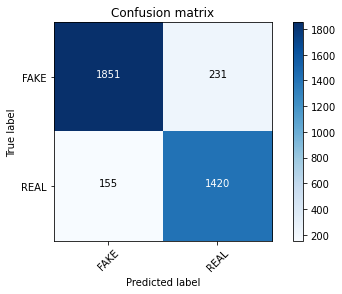

In [30]:

cm = metrics.confusion_matrix(y_test, pred)
print(cm)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## Passive Aggressive Classifier Algorithm

In [33]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clr = PassiveAggressiveClassifier(n_iter_no_change= 50)

In [34]:
linear_clr.fit(X_train , y_train)

PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.910
Confusion matrix, without normalization


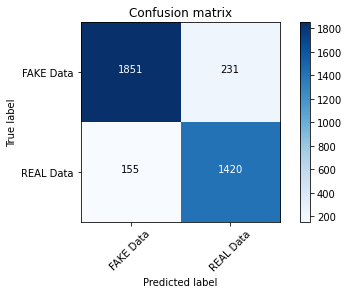

In [35]:
pred1 = linear_clr.predict(X_test)
score = metrics.accuracy_score(y_test , pred1)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

## Multinomial Classifier with Hyperparameter

In [38]:
classifier = MultinomialNB(alpha=0.1)

previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier = sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
Alpha: 0.0, Score : 0.8895269346458846
Alpha: 0.1, Score : 0.8955427946404156
Alpha: 0.2, Score : 0.8969100355482637
Alpha: 0.30000000000000004, Score : 0.8969100355482637
Alpha: 0.4, Score : 0.8955427946404156
Alpha: 0.5, Score : 0.896636587366694
Alpha: 0.6000000000000001, Score : 0.8969100355482637
Alpha: 0.7000000000000001, Score : 0.8960896910035548
Alpha: 0.8, Score : 0.8955427946404156
Alpha: 0.9, Score : 0.895269346458846


In [40]:
# Get Feature names
feature_names = cv.get_feature_names()


In [43]:
classifier.coef_[0]

array([ -8.92366263,  -8.66913276,  -9.26594883, ..., -10.96054455,
        -8.66913276,  -9.49420748])

In [44]:
# Most Real word
sorted(zip(classifier.coef_[0] , feature_names), reverse=True)[:20]

C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-3.9505335735121774, 'trump'),
 (-4.2650203614166236, 'hillari'),
 (-4.333238309008422, 'clinton'),
 (-4.836834161651471, 'elect'),
 (-5.178772759680767, 'new'),
 (-5.217185303430638, 'comment'),
 (-5.238776642369635, 'video'),
 (-5.342158598499691, 'war'),
 (-5.354334073582714, 'hillari clinton'),
 (-5.383333620231924, 'us'),
 (-5.396024145875969, 'fbi'),
 (-5.457473927114764, 'email'),
 (-5.475747619708007, 'vote'),
 (-5.557366796034481, 'world'),
 (-5.557366796034481, 'obama'),
 (-5.708271125152032, 'donald'),
 (-5.737789206873046, 'donald trump'),
 (-5.818880996696002, 'russia'),
 (-5.851909097850872, 'say'),
 (-5.851909097850872, 'presid')]

In [45]:
# Most fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-10.960544553198662, 'abroad'),
 (-10.960544553198662, 'abus new'),
 (-10.960544553198662, 'abus new york'),
 (-10.960544553198662, 'act new'),
 (-10.960544553198662, 'act new york'),
 (-10.960544553198662, 'adopt'),
 (-10.960544553198662, 'advic'),
 (-10.960544553198662, 'advis new'),
 (-10.960544553198662, 'advis new york'),
 (-10.960544553198662, 'age new'),
 (-10.960544553198662, 'age new york'),
 (-10.960544553198662, 'agenda breitbart'),
 (-10.960544553198662, 'aleppo new'),
 (-10.960544553198662, 'aleppo new york'),
 (-10.960544553198662, 'ali'),
 (-10.960544553198662, 'america breitbart'),
 (-10.960544553198662, 'america new york'),
 (-10.960544553198662, 'american breitbart'),
 (-10.960544553198662, 'american new'),
 (-10.960544553198662, 'american new york')]